# 와인 데이터 분석

Wine Quality 데이터셋: 포르투갈 “Vinho Verde” 와인의
화학적 성질과 전문가들에 의해 매겨진 품질 점수(0~10)를 기록한 것이다.

레드 와인과 화이트 와인 두 버전이 있으며,
와인의 품질이 어떤 물리·화학적 요소와 관련되는지 분석하기 위해 만들어졌다.
(와인의 품질(quality)을 예측하기 위한 회귀/분류 연구)
- `winequality-red.csv` : 레드 와인 데이터셋

| 컬럼 이름 | 설명 |
| --- | --- |
| `fixed acidity` | 고정 산도 |
| `volatile acidity` | 휘발성 산도 |
| `citric acid` | 시트르산 |
| `residual sugar` | 잔류 당분 |
| `chlorides` | 염화물 |
| `free sulfur dioxide` | 유리 이산화황 |
| `total sulfur dioxide` | 총 이산화황 |
| `density` | 밀도 |
| `pH` | 산성도 |
| `sulphates` | 황산염 |
| `alcohol` | 알코올 도수 |
| `quality` | 품질 점수 (0-10점); 타겟 변수 |


### 1. 환경 설정

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8-darkgrid')

df = pd.read_csv('../data/winequality-red.csv', sep =';')

### 2. 데이터 기본 구조 및 결측치 확인

In [3]:
print(f"데이터셋 형태: {df.shape}")
print("\n데이터셋 상위 5개 행:")
print(df.head())
print("\n데이터셋 정보:")
df.info()

데이터셋 형태: (1599, 12)

데이터셋 상위 5개 행:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      

shape의 출력 결과를 보았을 때, 1599의 행과 12개의 열로 확인 가능.  
df.info를 통해서 결측값과 type 확인.  

=> 모든 변수들에 대해서 1599개의 행이 존재. 따라서 결측치가 없음.
=> 모든 타임이 수치형으로 quality만 정수형.

### 3. 기술 통계 및 타겟 변수 분포 분석

In [4]:
print("\n수치형 변수 기술 통계:")
print(df.describe().T)


수치형 변수 기술 통계:
                       count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%       

quality (품질 점수): 평균이 약 5.64점이며, 표준 편차는 0.817입니다. 
- 최솟값 3, 최댓값 8로, 대부분의 와인이 **중간 품질(5점, 6점)**에 집중됨.

C:\Users\USER\AppData\Local\Temp\ipykernel_13264\368119414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')
c:\Users\USER\miniconda3\envs\learn_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\learn_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\learn_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\learn_env\lib\site-packages\IPytho

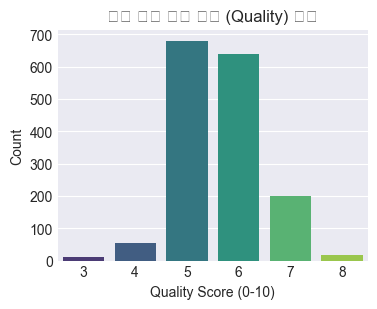


품질 점수별 데이터 개수:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [5]:
# 3.2 타겟 변수 분포 확인
plt.figure(figsize=(4, 3))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('레드 와인 품질 점수 (Quality) 분포')
plt.xlabel('Quality Score (0-10)')
plt.ylabel('Count')
plt.show()

print("\n품질 점수별 데이터 개수:")
print(df['quality'].value_counts().sort_index())

- 데이터의 **약 82.5%**가 중간 품질인 5점 또는 6점에 집중되어 있습니다.
    - 이는 클래스 불균형(Imbalanced Class) 문제가 발생.
    - 품질 예측 모델링 시 오버샘플링(Oversampling)이나 언더샘플링(Undersampling) 또는 F1-Score와 같은 적절한 평가 지표를 고려해야 합니다.

### 4. 상관 관계 분석

c:\Users\USER\miniconda3\envs\learn_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\learn_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\learn_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\learn_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\miniconda3\envs\learn_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(

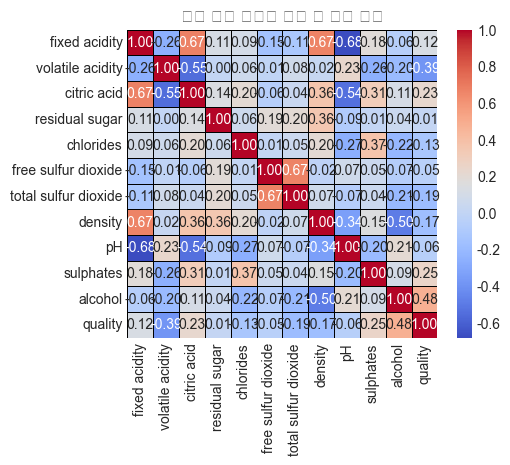

In [6]:
plt.figure(figsize=(5, 4))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, linecolor='black')
plt.title('레드 와인 화학적 특성 간 상관 관계')
plt.show()

In [7]:
# 4.1 quality와 다른 특성 간의 상관관계 
quality_corr = corr_matrix['quality'].sort_values(ascending=False)
print("\n품질(Quality)과 다른 특성 간의 상관 관계:")
print(quality_corr)


품질(Quality)과 다른 특성 간의 상관 관계:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


- 양의 상관관계 : alchogo이 품질과 가장 강한 양의 상관관계(0.48)
- 음의 상관관계 : volatile acidity(휘발성 산도)가 품질과 가장 강한 음의 상관관계(-0.39)